<a href="https://colab.research.google.com/github/irisnoww/A-B-test/blob/main/Spanish_Translation_A_B_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Company XYZ is a worldwide e-commerce site with localized versions of the site.

A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than
any other Spanish-speaking country. She therefore went and talked to the international team in
charge of Spain And LatAm to see if they had any ideas about why that was happening.

Spain and LatAm country manager suggested that one reason could be translation. All Spanishspeaking
countries had the same translation of the site which was written by a Spaniard. They
agreed to try a test where each country would have its one translation written by a local. That is,
Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican
and so on. Obviously, nothing would change for users from Spain.
After they run the test however, they are really surprised cause the test is negative. I.e., it
appears that the non-localized translation was doing better!

You are asked to:
- Confirm that the test is actually negative. That is, it appears that the old version of the
site with just one translation across Spain and LatAm performs better
- Explain why that might be happening. Are the localized translations really worse?
- If you identified what was wrong, design an algorithm that would return FALSE if the
same problem is happening in the future and TRUE if everything is good and the results
can be trusted.

In [ ]:
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
https://drive.google.com/file/d/1J-viwecL-3DPX4Wj7Hre0E0MbsJn0qu4/view?usp=sharing

In [ ]:
wb = gc.open_by_url("https://docs.google.com/spreadsheets/d/1pwb2aVVRnDTy2f7jxSlv-RRw6YZ4NcPosFGNHvt3dIE/edit#gid=1082540287")

In [ ]:
#user
wb = gc.open_by_url("https://docs.google.com/spreadsheets/d/1qGfe4x4AtXBw6QZLnoFU_2cWeR4lGLr6h1-ZkqEUt8w/edit#gid=753865299")

In [ ]:
def data_input(tab):
  data = pd.DataFrame(wb.worksheet(tab).get_all_values())
  header = data.iloc[0]
  data = data[1:]
  data.columns = header
  return data

In [ ]:
test_df = data_input('test_table')

In [ ]:
user_df = data_input('user_table')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 1 to 453321
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           453321 non-null  object
 1   date              453321 non-null  object
 2   source            453321 non-null  object
 3   device            453321 non-null  object
 4   browser_language  453321 non-null  object
 5   ads_channel       453321 non-null  object
 6   browser           453321 non-null  object
 7   conversion        453321 non-null  object
 8   test              453321 non-null  object
dtypes: object(9)
memory usage: 31.1+ MB


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 1 to 452867
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  object
 1   sex      452867 non-null  object
 2   age      452867 non-null  object
 3   country  452867 non-null  object
dtypes: object(4)
memory usage: 13.8+ MB


In [ ]:
test_df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
1,315281,2015-12-03,Direct,Web,ES,NA,IE,1,0
2,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
3,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
4,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
5,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [ ]:
user_df.head()

,user_id,sex,age,country
1,765821,M,20,Mexico
2,343561,F,27,Nicaragua
3,118744,M,23,Colombia
4,987753,F,27,Venezuela
5,554597,F,20,Spain


In [ ]:
#check how many users in each table
len(test_df['user_id'].unique())

453321

In [ ]:
len(user_df['user_id'].unique())

452867

In [ ]:
#user_df has less users --> perfomr left join
df = test_df.merge(user_df, how='left', on='user_id')

In [ ]:
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NA,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           453321 non-null  object
 1   date              453321 non-null  object
 2   source            453321 non-null  object
 3   device            453321 non-null  object
 4   browser_language  453321 non-null  object
 5   ads_channel       453321 non-null  object
 6   browser           453321 non-null  object
 7   conversion        453321 non-null  int64 
 8   test              453321 non-null  int64 
 9   sex               452867 non-null  object
 10  age               452867 non-null  object
 11  country           452867 non-null  object
dtypes: int64(2), object(10)
memory usage: 45.0+ MB


In [ ]:
df['conversion'] = pd.to_numeric(df['conversion'])
df['test'] = pd.to_numeric(df['test'])

Q1: Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better

In [ ]:
#1st question 
#groupby set as_index = False
country_val = df[df['test'] == 0][['country','conversion']].groupby('country', as_index=False).mean()

In [ ]:
country_val = country_val.reset_index().sort_values(by='conversion', ascending = False)

In [ ]:
country_val.head()

,country,conversion
14,Spain,0.079719
6,El Salvador,0.053554
10,Nicaragua,0.052647
4,Costa Rica,0.052256
3,Colombia,0.052089


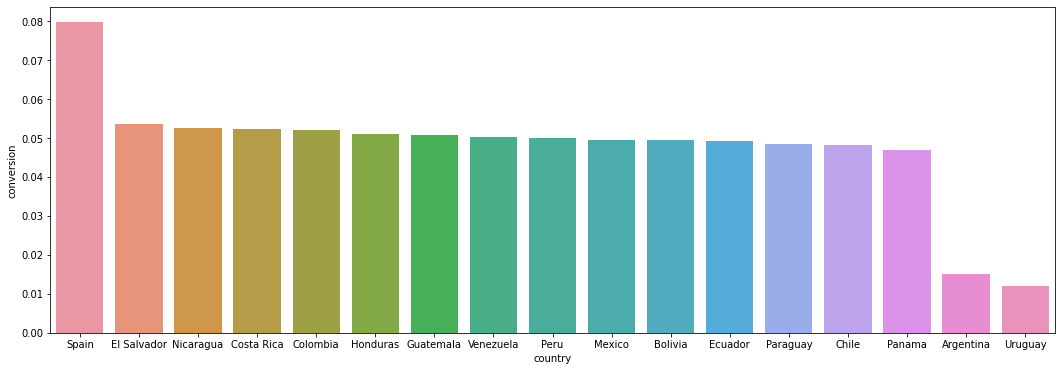

In [ ]:
#plot bar chart to better view the results
fig, ax = plt.subplots(figsize = (18, 6))
sns.barplot(x = 'country', y = 'conversion', data= country_val, ax=ax)


Text(0.5, 1.0, 'comparing conversion between test and non-test')

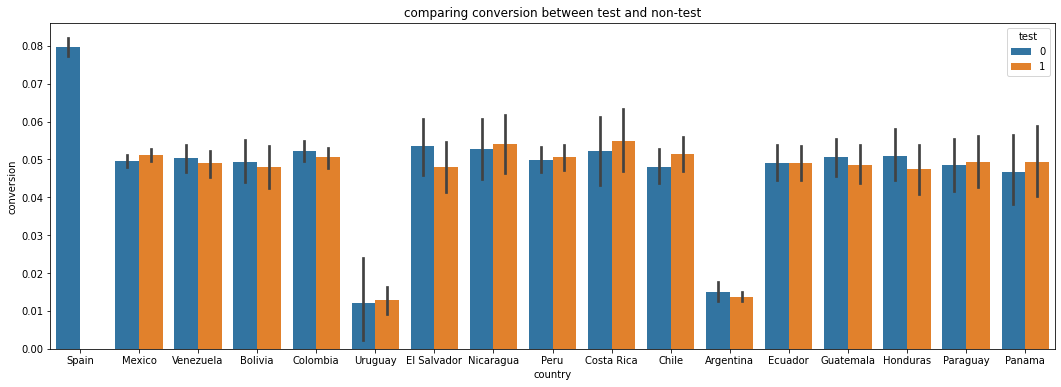

In [ ]:
#comparing test vs contro
fig, ax = plt.subplots(figsize = (18,6))
sns.barplot(x = 'country', y = 'conversion', hue = 'test', data= df)
plt.title('comparing conversion between test and non-test')

In [ ]:
#perform t-test to exam if there is true diff between test & control
#drop spain as no diff
#sample mean estimate
df_drop_sp =  df[df['country'] != 'Spain']
test_cv = df_drop_sp[df_drop_sp['test'] == 1]['conversion'].values
control_cv = df_drop_sp[df_drop_sp['test'] == 0]['conversion'].values

In [ ]:
#t test
#H0: test_cv.mean() - control_cv.mean() =0
#H1: test_cv.mean() - control_cv.mean() !=0
ttest_ind(test_cv, control_cv, equal_var= False)

Ttest_indResult(statistic=-7.3939374121344805, pvalue=1.4282994754055316e-13)

In [ ]:
#test performs even worse

In [ ]:
print(test_cv.mean(), control_cv.mean())

0.043424713982118966 0.04833042316066309


In [ ]:
#analyze data by subset
def subset_df(df,cat):
  subset = df.groupby(cat).agg({'conversion': sum, 'count':sum})
  subset['conversation_rate'] = subset['conversion']/subset['count']
  return subset

In [ ]:
subset = subset_df(df, 'country')

In [ ]:
#plot bar charts
def subset_barchart(df, cat):
  fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
  sns.countplot(x = cat, data = df, hue = 'test', ax = ax[0])
  ax[0].set_xticklabels(labels = df[cat].unique())
  title = 'countplot for' + cat
  ax[0].set_title(title)

  sns.barplot(x = cat, y = 'conversion_rate', data = df, hue = 'test', ax = ax[1] )
  title = 'conversion barplot for'+ cat
  ax[1].set_title(title)

In [ ]:
#check for each subset

In [ ]:
#check t stats for each country
countries = list(df['country'].unique())
for country in countries:
  test_cr = df[(df['country']==country) & (df['test'] ==1)]['conversion']
  control_cr = df[(df['country']==country) & (df['test']==0)]['conversion']
  p_value = ttest_ind(test_cr, control_cr, eqaul_var = False)
  test_mean = test_cr.mean()
  control_mean = control_cr.mean()
  print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Country', 'Test Rate', 'Control Rate', 'P-Value'))
  print('-' * 65)
  print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(country, test_mean, cont_mean, p_val))

In [ ]:
# Define a function create_df that will create a new dataframe with the 
# conversion rate according to the groupings
def create_df(cat):
    '''Group the data by the [cat]'''
    new_df = merged_df.groupby(cat).agg({'conversion':sum, 'count':sum})
    new_df['conversion_rate'] = new_df['conversion'] / new_df['count']
    return new_df


# Define a function create_plots to create barplots according to the provided dataframe
def create_plots(df, cat):
    '''Plot barplots and histograms for conversion rate and ditribution 
    given the dataframe'''
    fig, ax = plt.subplots(nrows=2, figsize=(14,8))
    
    # Plot the distribution
    sns.barplot(x=cat, y='count', hue='test', data=df, ax=ax[0])
    ax[0].set_xticklabels(labels=df[cat].unique(), rotation=45)
    
    # Plot the conversion rates
    sns.barplot(x=cat, y='conversion_rate', hue='test', data=df, ax=ax[1])
    ax[1].set_xticklabels(labels=df[cat].unique(), rotation=45)
    
    plt.tight_layout()